## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

## Reading and typecasting the data

In [2]:
#df=pd.read_csv('student_course_data.csv',index_col=0)

import mysql.connector as connection
try:
    mydb = connection.connect(host="localhost", database = 'student_course_data',user="root", passwd="J4swanth",use_pure=True)
    query = "Select * from sc_data;"
    df = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = df.columns.str.lower()
df.head()

C:\Users\EliteSniper\AppData\Local\Temp\ipykernel_4432\338159174.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,mydb)


,student_name,course_name,nationality,school,gender,age,modes_of_learning,session,field_of_interest,difficulty_level,course_recommended,course_rating
0,student 1,Robotics Innovative Learning,UK,Suchitran,Female,10,Online,24,Art,Applied Tech,Robotics Innovative Learning,5
1,student 2,Robotics Innovative Learning,Poland,Indian School Bahrain,Male,10,Online,96,Mathematics,Beginner,Robotics Innovative Learning,5
2,student 3,Spring Camps,China,"Indian School Muscat, Oman",Male,10,In-person,48,Music,Proficiency,Python,1
3,student 4,Python Programming,Palestine,International school of Choueifat,Female,10,Online,48,Music,Proficiency,Technology Innovative Learning,5
4,student 5,Python Coding,United States,AUH,Female,10,In-person,48,Technology,Applied Tech,Robotics Innovative Learning,4


## Renaming columns

In [3]:
df = df.rename(columns={'demographic_data': 'gender','course_selected': 'course_name'})
df.shape

(9806, 12)

## Checking for N/A values

In [4]:
df.isna().sum()

student_name          0
course_name           0
nationality           0
school                0
gender                0
age                   0
modes_of_learning     0
session               0
field_of_interest     0
difficulty_level      0
course_recommended    0
course_rating         0
dtype: int64

## Data Formatting

In [5]:
### Checking unique values in each column
for col in df:
    print(col)
    print(df[col].unique())
    print('\n')

student_name
['student 1' 'student 2' 'student 3' ... 'student 9804' 'student 9805'
 'student 9806']


course_name
['Robotics Innovative Learning' 'Spring Camps' 'Python Programming'
 'Python Coding' 'Artificial Intelligence'
 'Technology Innovative Learning' 'Gulf News - Game and App Development'
 'Graphic Designing & Animation' 'Public Speaking & Entrepreneurship'
 'Gulf News - Metaverse' 'World Robot Olympiad (WRO)' 'Drone Technology'
 'Gulf News - Robotics Innovative Learning'
 'Gulf News - Artificial Intelligence'
 'Artificial Intelligence for Non Programmers' 'Mid Term Program'
 'LEGO Robotics' 'Space STEM' 'VEX Robotics'
 'FIRST LEGO LEAGUE (FLL - 2022/23)' 'Young App Developer'
 'Scratch Coding' 'Gulf News - Data Analysis with Python'
 'Game Development with Unity' '3D Designing & Modelling' 'Metaverse'
 'Graphic Designing' 'Young Coder' 'Young Game Developer'
 'Technology Onsite' 'STEM Jr' 'School' 'Data Science' 'Winter Camp 2022'
 'VEX Robotics Competition (VRC - 2023/24)' '

In [6]:
#Converting to lower case

df['course_name']=df['course_name'].str.replace('Gulf News - ','')
df['course_name']=df['course_name'].str.replace('Bootcamp - ','')
#df['course_name']=df['course_name'].str.replace('`- Python/JAVA/HTML/C/C++`','')
df['course_name']=df['course_name'].str.replace(' Winter Internship Program','')
df['course_name']=df['course_name'].str.replace(' - Microsoft Arcade','')
df['course_name']=df['course_name'].str.replace(' - Block-Based','')
#df['course_name']=df['course_name'].str.replace(' - Block-Based','')
df['course_name']=df['course_name'].str.replace('Robotics/Virtual Robotics/Robotics Programming','Robotics')
df['course_name']=df['course_name'].str.split('(').str[0]
df['course_name']=df['course_name'].str.split('-').str[0]

for i in df.columns:
    if df[i].dtype=='object':
        df[i]=df[i].map(str.strip)
    else:
        pass 
    
    replacers = {
    'Python Coding': 'Python Programming',
    #'Game and App Development': 'Game Development',
    #'Graphic Designing & Animation':'Graphic Designing',
    'Public Speaking & Entrepreneurship':'Public Speaking ',
    #'Artificial Intelligence for Non Programmers':'Artificial Intelligence',
    'Space STEM':'Robotics',
    #'VEX Robotics':'Virtual Robotics',
    #'FIRST LEGO LEAGUE ':'LEGO Robotics',
    #'Scratch Coding':'Programming',
    #'Game Development with Unity':'Game Development',
    #'Young Game Developer':'Game Developement',
    'School':'Robotics',
    #'Artificial Intelligence & Machine Learning':'Artificial Intelligence and Machine Learning',
    #'Virtual Robotics & Mechatronics':'Virtual Robotics',
    'Artificial Intelligence Summer Program & Internship':'Artifical Intelligence',
    'Programming & Coding ':'Programming',
    'FIRST Lego League ':'LEGO Robotics',
    #'Game Combat Championship ' :'Game Developement',
    'JAVA':'JAVA Programming',
    'World Robot Olympiad Webinar':'Robotics',
    'STEM Sr':'Robotics',
    #'Microsoft Arcade':'Game Developement',
    #'Augmented & Virtual Reality' :'Virtual Reality',
    #'App Design and Development':'App Development',
    'Public Speaking, Design Thinking and Junior Entrepreneur Program for Students':'Young Entrepreneur',
    'Mid Term Program':'Artifical Intelligence',
    'Winter Camp 2022':'Robotics',
    'Summer Camp 2022':'Robotics',
    'Winter Camp 2021':'Robotics',
    'Coding for kids':'Coding For kids',
    'Summer Camps':'Robotics',
    'Python':'Python Programming',
    'Artifical Intelligence':'Artificial Intelligence',
    'Artificial Intelligence Program':'Artificial Intelligence',
    'Artificial Intelligence & Machine Learning':'Artificial Intelligence and Machine Learning',
    'ALIF Robotics Workshop':'Robotics',
    'Tech Summer Camp for Juniors' :'Robotics',
    'AI' :'Artificial Intelligence',
    #'Drone Technology & Aerodynamics':'Drone Technology',
    #'Coding for kids':'Programming',
    'Game Dev with SCRATCH':'Game Development',
    'Canon Junior Photography':'Photography',
    #'Coding For Kids':'Programming',
    'VEX Robotics Competition ':'Virtual Robotics',
    'VEX IQ Competition ': 'Virtual Robotics',
    'FIRST LEGO LEAGUE':'First LEGO League',
    'Metaverse':'Virtual Reality',
    'STEM Jr':'Robotics',
    #'3D Designing':'Graphic Designing',
    #'3D Designing and Printing':'Graphic Designing',
    'Graphics Designing':'Graphic Designing',
    'Spring Camps':'Robotics',
    'CIS Stem Junior Year':'Robotics',
    'CIS Tech Innovator Year':'Robotics',
    'Robotics Regent':'Robotics',
    'Game Development Microsoft Arcade':'Microsoft Arcade',
    'Game Development Block':'Game Development'
    }

    df['course_name'] = df['course_name'].replace(replacers)

    df = df.loc[~((
    (df['course_name']=='Art & Craft for Juniors')|
    (df['course_name']=='Technology Onsite ')|
    (df['course_name']=='French Language Course')|
    (df['course_name']=='Speech and Drama')|
    #(df['course_name']=='Young Product Designer')|
    (df['course_name']=='Tech Innovator')|
    (df['course_name']=='Train the Trainer')|
    (df['course_name']=='CIS, Dubai')|
    #(df['course_name']=='Young Honcho')|
    (df['course_name']=='Half Term Camp 2022')|
    (df['course_name']=='Technology Boot Camp')|
    (df['course_name']=='World Robot Olympiad ')|
    (df['course_name']=='Photography')|
    (df['course_name']=='Public Speaking')|
    (df['course_name']=='Spring Camp')|
    (df['course_name']=='Arduino')))]


In [7]:
df.dtypes

student_name          object
course_name           object
nationality           object
school                object
gender                object
age                   object
modes_of_learning     object
session                int64
field_of_interest     object
difficulty_level      object
course_recommended    object
course_rating          int64
dtype: object

In [8]:
##preprocess age
df = df[(df.age != "14-Oct") & (df.age != "9-May")]
df['age'] = df['age'].replace(['1'], 'Year 1')
df['age'] = df['age'].replace(['2'], 'Year 2')
df['age'] = df['age'].replace(['3'], 'Year 3')
df['age'] = df['age'].replace(['4'], 'Year 4')
df['age'] = df['age'].replace(['5'], 'Year 5')
df['age'] = df['age'].replace(['6'], 'Year 6')
df['age'] = df['age'].replace(['7'], 'Year 7')
df['age'] = df['age'].replace(['8'], 'Year 8')
df['age'] = df['age'].replace(['9'], 'Year 9')
df['age'] = df['age'].replace(['10'], 'Year 10')
df['age'] = df['age'].replace(['11'], 'Year 11')
df['age'] = df['age'].replace(['12'], 'Year 12')
df['age'] = df['age'].replace(['13'], 'Year 13')
df['age'] = df['age'].replace(['14'], 'Year 14')
df['age'] = df['age'].replace(['15'], 'Year 15')
df['age'] = df['age'].replace(['Year 1'], '5')
df['age'] = df['age'].replace(['Year 2'], '6')
df['age'] = df['age'].replace(['Year 3'], '7')
df['age'] = df['age'].replace(['Year 4'], '8')
df['age'] = df['age'].replace(['Year 5'], '9')
df['age'] = df['age'].replace(['Year 6'], '10')
df['age'] = df['age'].replace(['Year 7'], '11')
df['age'] = df['age'].replace(['Year 8'], '12')
df['age'] = df['age'].replace(['Year 9'], '13')
df['age'] = df['age'].replace(['Year 10'], '14')
df['age'] = df['age'].replace(['Year 11'], '15')
df['age'] = df['age'].replace(['Year 12'], '16')
df['age'] = df['age'].replace(['Year 13'], '17')
df['age'] = df['age'].replace(['Year 14'], '18')
df['age'] = df['age'].replace(['Year 15'], '19')
df['age'] = df['age'].replace(['FS 1'], '5')
df['age'] = df['age'].replace(['FS 2'], '6')
df['age'] = df['age'].replace(['KG 1'], '5')
df['age'] = df['age'].replace(['KG 2'], '6')
df['age'] = df['age'].replace(['KG2'], '6')
df['age'] = df['age'].replace(['University/College'], '16')
df['age'] = df['age'].replace(['Working Professional'], '16')

df=df.groupby("age").filter(lambda x: len(x) > 5)
## Typecasting
df['age'] = pd.to_numeric(df['age'])

In [9]:
##finding count of values in age
#plt.bar(ages_df['age'],ages_df['age_count'], color ='lightblue',width = 1,ec='black')
#ages_df=df.sort_values(['age'],ascending=False`).groupby(['age'])['age'].count().reset_index(name='age_count')

## Creating new column

In [10]:
#df['education'] = np.where(df['age']>= 14, 'College', 'School')

col         = 'age'
conditions  = [ (df[col] >=5) & (df[col]<10), (df[col] >=10) & (df[col]<14),(df[col] >=14)]
choices     = ['Elementary school (5-9)', 'Middle school (10-13)','High school/College (14+)' ]
    
df["education"] = np.select(conditions, choices, default=np.nan)

## Create ID for student

In [11]:
#df['student_id']=df.student_name.str.extract('(\d+)')
np.random.seed(100)
df['student_id'] = np.random.randint(1,3000, df.shape[0])

## Create ID for course

In [12]:
course_df=pd.DataFrame(df['course_name'].unique(),columns=["course_name"])
index = pd.Index(range(0, len(course_df.index), 1))
course_df["course_id"] = course_df.index
course_df.head(5)

,course_name,course_id
0,Robotics Innovative Learning,0
1,Robotics,1
2,Python Programming,2
3,Artificial Intelligence,3
4,Technology Innovative Learning,4


In [13]:
df=df.merge(course_df,on="course_name",how="left")

In [17]:
df=df[['student_id','student_name','age','nationality','gender',
       'education','school','field_of_interest','course_id',
       'course_name','session','course_rating','difficulty_level','modes_of_learning','course_recommended']]

## Export CSV

In [29]:
df.to_csv("processed_data.csv",index=False)

## EDA

In [19]:
# for p in ax.patches:
#     percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#     x = p.get_x() + p.get_width()
#     y = p.get_height()
#     ax.annotate(percentage, (x, y),ha='center')
# plt.show()

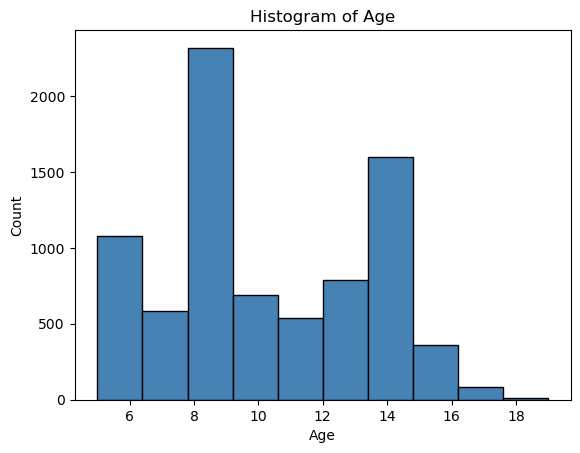

In [20]:
plt.hist(df['age'], color='steelblue', ec='black')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Age")
plt.show()

In [21]:
# df['course_rating'] = df['course_rating'].astype('category')
# plt.bar(df['course_rating'], color='steelblue', ec='black')
# plt.xlabel("Rating")
# plt.ylabel("Count")
# plt.title("")
# plt.show()

In [22]:
temp=df.groupby(['modes_of_learning'])['modes_of_learning'].count().reset_index(name='no_of_students').sort_values('no_of_students',ascending=False)
temp['percentage_of_students'] = temp['no_of_students'] / np.sum(temp['no_of_students']) * 100


temp2=df.groupby(['field_of_interest'])['field_of_interest'].count().reset_index(name='no_of_students').sort_values('no_of_students',ascending=False)
temp2['percentage_of_students'] = temp2['no_of_students'] / np.sum(temp2['no_of_students']) * 100


temp3=df.groupby(['difficulty_level'])['difficulty_level'].count().reset_index(name='no_of_students').sort_values('no_of_students',ascending=False)
temp3['percentage_of_students'] = temp3['no_of_students'] / np.sum(temp3['no_of_students']) * 100


temp4=df.groupby(['gender'])['gender'].count().reset_index(name='no_of_students').sort_values('no_of_students',ascending=False)
temp4['percentage_of_students'] = temp4['no_of_students'] / np.sum(temp4['no_of_students']) * 100


temp5=df.groupby(['session'])['session'].count().reset_index(name='no_of_students').sort_values('no_of_students',ascending=False)
temp5['percentage_of_students'] = temp5['no_of_students'] / np.sum(temp5['no_of_students']) * 100


In [23]:
temp

,modes_of_learning,no_of_students,percentage_of_students
0,Hybrid,2717,33.768332
2,Online,2668,33.159334
1,In-person,2661,33.072334


[Text(0.5, 80.7222222222222, 'Age'),
 Text(1172.3031045751634, 0.5, 'Count'),
 Text(0.5, 1.0, 'Histogram of Age')]

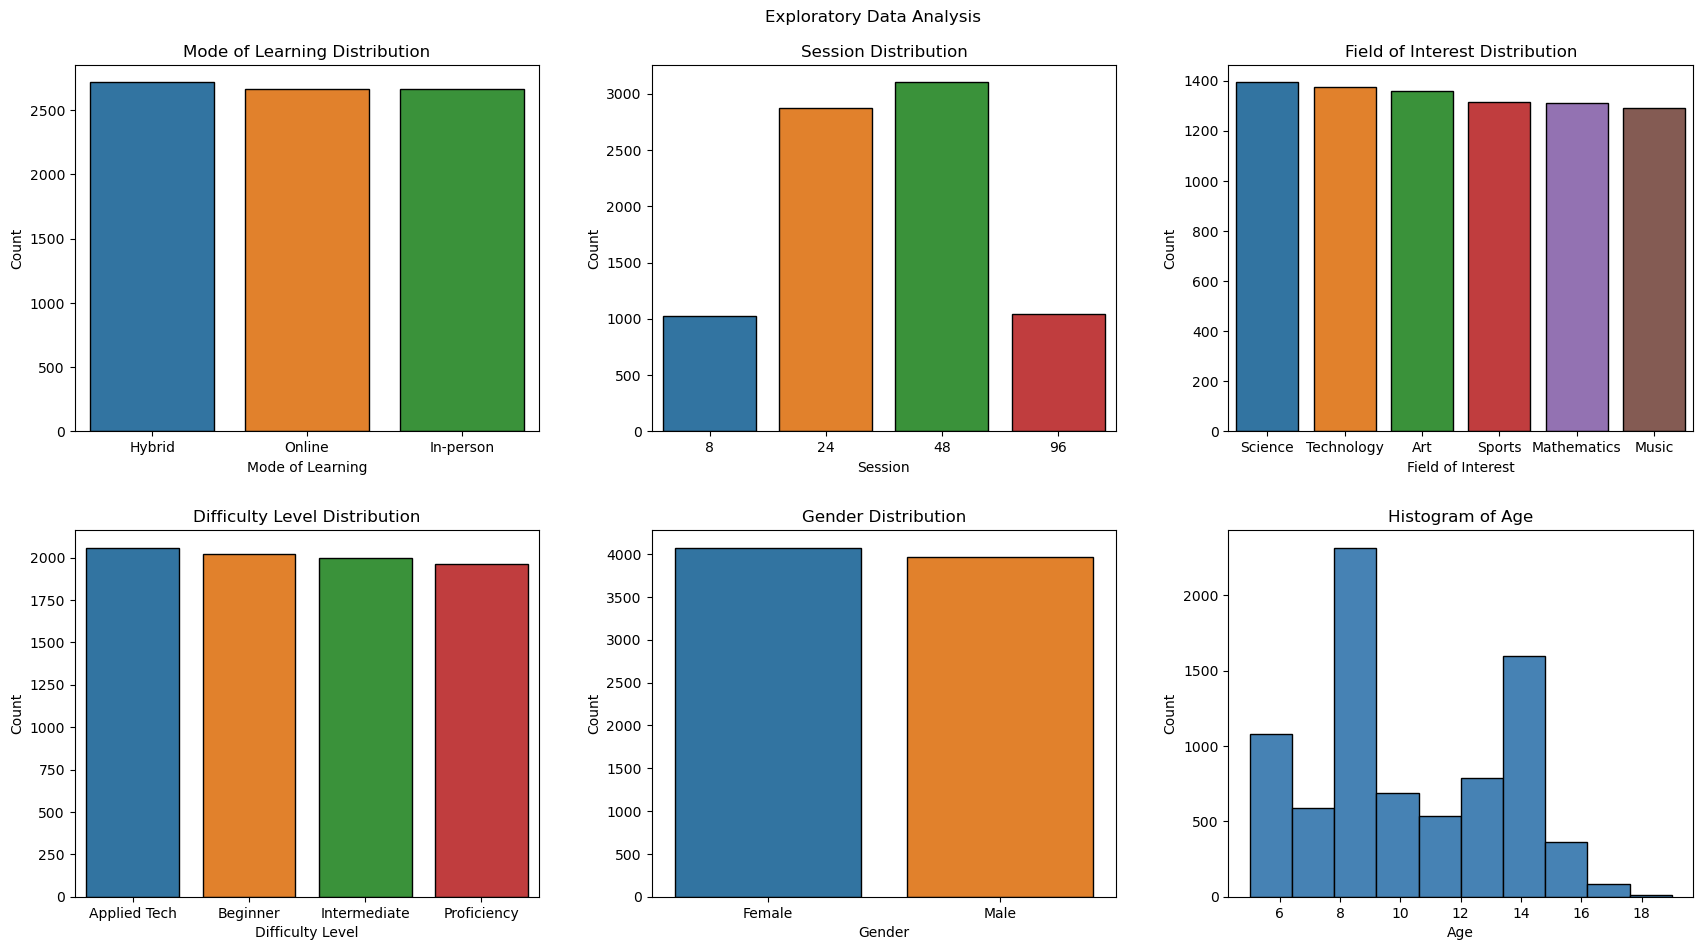

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.tight_layout(pad=5.0)
fig.suptitle('Exploratory Data Analysis')

sns.barplot(ax=axes[0,0], data=temp, x='modes_of_learning', y='no_of_students',ec='black')
axes[0,0].set(xlabel="Mode of Learning",ylabel="Count",title="Mode of Learning Distribution")
sns.barplot(ax=axes[0,1], data=temp5, x='session', y='no_of_students',ec='black')
axes[0,1].set(xlabel="Session",ylabel="Count",title="Session Distribution")
sns.barplot(ax=axes[0,2], data=temp2, x='field_of_interest', y='no_of_students',ec='black')
axes[0,2].set(xlabel="Field of Interest",ylabel="Count",title="Field of Interest Distribution")
sns.barplot(ax=axes[1,0], data=temp3, x='difficulty_level', y='no_of_students',ec='black')
axes[1,0].set(xlabel="Difficulty Level",ylabel="Count",title="Difficulty Level Distribution")
sns.barplot(ax=axes[1,1], data=temp4, x='gender', y='no_of_students',ec='black')
axes[1,1].set(xlabel="Gender",ylabel="Count",title="Gender Distribution")
plt.hist(df['age'], color='steelblue', ec='black')
axes[1,2].set(xlabel="Age",ylabel="Count",title="Histogram of Age")

In [25]:
course_count = df.groupby(['course_name'])['course_name'].count().reset_index(name='no_of_courses').sort_values('no_of_courses',ascending=False)
course_count=course_count.merge(course_df,on="course_name",how="left")
course_count['course_id'] = course_count['course_id'].astype('category')
#course_count.reset_index(inplace=True)
course_count.head(5)

,course_name,no_of_courses,course_id
0,Robotics,2231,1
1,Artificial Intelligence,834,3
2,Python Programming,405,2
3,Robotics Innovative Learning,307,0
4,3D Designing & Modelling,278,17


In [26]:
df.course_rating.value_counts()

4    3231
3    2604
5    1644
2     413
1     154
Name: course_rating, dtype: int64

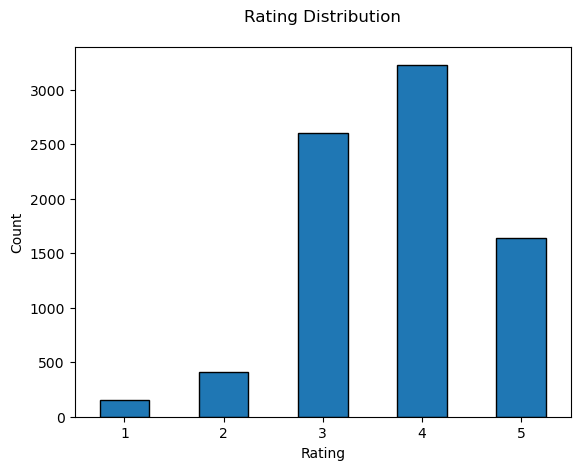

In [27]:
df.course_rating.value_counts()[[1,2,3,4,5]].plot(kind='bar',ec='black')

plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 360)
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

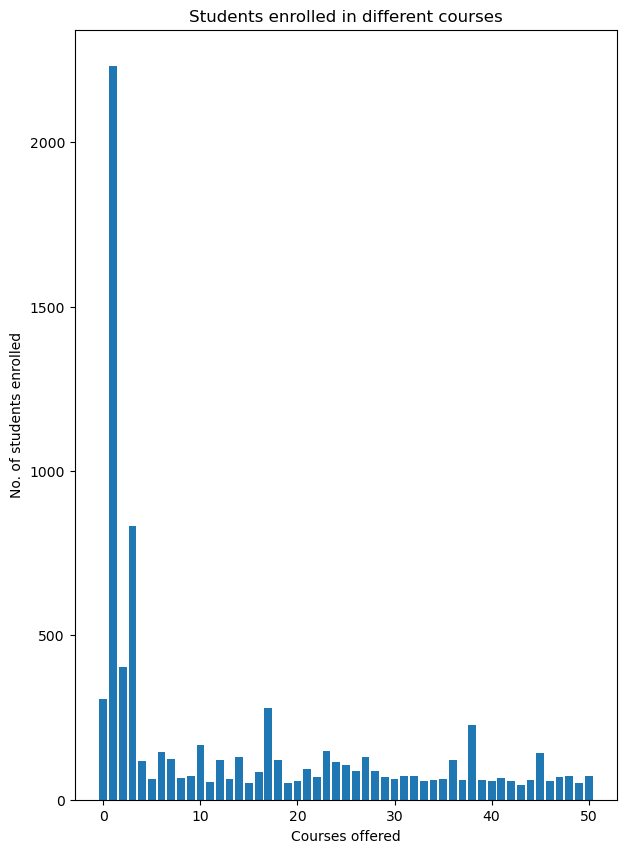

In [28]:
fig = plt.figure(figsize = (7, 10))
 
#creating the bar plot
#plt.barh(course_count['course_name'],course_count['no_of_courses'], color ='blue',width = 1)
plt.bar(course_count['course_id'],course_count['no_of_courses'])

plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()